<a href="https://colab.research.google.com/github/Talendar/stocks_prices_prediction/blob/main/multi_stocks_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction of Stocks Prices with Deep Learning**

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import display, Javascript
from google.colab import files

import os
import shutil
from datetime import datetime

!pip install tensorflow==2.4.0-rc4
import tensorflow as tf

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
tf.keras.backend.set_floatx('float64')

!pip install scikit-learn==0.24.0rc1

!pip install yahooquery
from yahooquery import Ticker

!rm -rf stocks
!git clone https://github.com/Talendar/stocks_prices_prediction stocks

%load_ext autoreload
%autoreload 2

from stocks.aux.stocks_data import MultiStocksDataset
from stocks.aux.eval import *
from stocks.aux.normalization import *
from stocks.aux.tf_callbacks import ClearCallback
Javascript("google.colab.output.setIframeHeight('250px');")

## **0) Base settings**

In [2]:
NUM_SESSIONS = 10  # number of previous trading sessions the model will analyse in order to make a prediction
NORMALIZE_LABELS = True

TRAIN_PC, VAL_PC, TEST_PC = 0.8, 0.12, 0.08
assert (TRAIN_PC + VAL_PC + TEST_PC) == 1

LABELS_NAMES = [    # values that the model will try to predict
    "open", "low", "high",
]

INTERVAL = "1d"
NAME_LIST = ["^BVSP", "^DJI", "^GSPC", "^IXIC", "^NYA", "^FTSE", "^FCHI"]

# loading stocks with specific params:
STOCKS = {
}

# loading stocks from NAME_LIST with default info (same params for all):
STOCKS.update({name: {"start": "2007-01-01",
                      "end": "2020-12-08",
                      "period": None} \
               for name in NAME_LIST})

## **1) Preparing the data**

#### **1.1) Fetching and pre-processing the data**

In [3]:
multi_data = {
    name: Ticker(name).history(start=info["start"],
                               end=info["end"],
                               period=info["period"], 
                               interval=INTERVAL).reset_index("symbol", drop=True) \
    for name, info in STOCKS.items()
}

multi_data = MultiStocksDataset(
    stocks=multi_data, 
    num_sessions=NUM_SESSIONS,
    labels_names=LABELS_NAMES,
    batch_size=42,
    data_split_pc=(TRAIN_PC, VAL_PC, TEST_PC),
    feature_normalization=(min_max_norm, min_max_denorm), 
    label_normalization=(min_max_norm, min_max_denorm) \
                        if NORMALIZE_LABELS else None,
)

#### **1.2) Inspecting the data**



###################################   ^BVSP   ###################################

. Period: from 2007-01-02 to 2020-12-07
. Trading sessions: 3441
. Data:



,close,open,low,volume,high
date,,,,,
2007-01-02,45383.0,44476.0,44476.0,75560200.0,45388.0
2007-01-03,44445.0,45379.0,44284.0,122372800.0,45379.0
2007-01-04,44020.0,44442.0,43623.0,86577000.0,44442.0
2007-01-05,42245.0,44019.0,42160.0,164055000.0,44081.0
2007-01-08,42830.0,42249.0,42144.0,114007100.0,42926.0
...,...,...,...,...,...
2020-12-01,111335.0,108897.0,108897.0,11324800.0,111840.0
2020-12-02,111814.0,111402.0,110579.0,9814300.0,112315.0
2020-12-03,112919.0,111874.0,111874.0,11474200.0,113377.0



. Statistics:



,close,open,low,volume,high
count,3441.000000,3441.00000,3441.000000,3.441000e+03,3441.000000
mean,64588.594885,64568.33159,63899.225516,8.226186e+06,65241.841616
std,17590.489320,17568.05804,17483.078299,2.272670e+07,17668.235175
min,29435.000000,29438.00000,29435.000000,0.000000e+00,31480.000000
25%,52764.000000,52758.00000,52190.000000,2.243600e+06,53312.000000
50%,60452.000000,60416.00000,59815.000000,3.313000e+06,61188.000000
75%,70385.000000,70377.00000,69698.000000,4.578200e+06,70958.000000
max,119528.000000,119528.00000,118108.000000,2.322653e+08,119593.000000



. Plot:



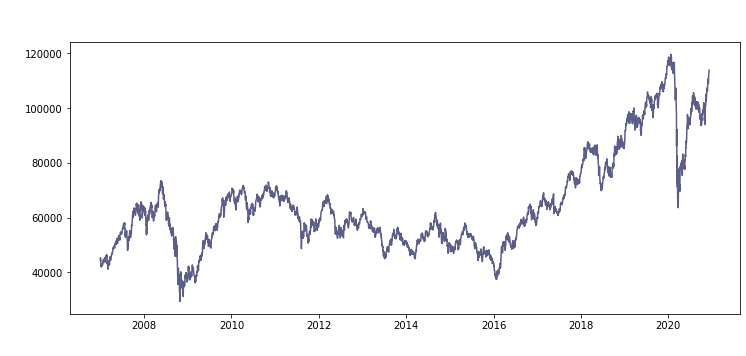



################################################################################




###################################   ^DJI   ###################################

. Period: from 2007-01-03 to 2020-12-07
. Trading sessions: 3508
. Data:



,close,open,high,volume,low
date,,,,,
2007-01-03,12474.519531,12459.540039,12580.349609,327200000,12404.820312
2007-01-04,12480.690430,12473.160156,12510.410156,259060000,12403.860352
2007-01-05,12398.009766,12480.049805,12480.129883,235220000,12365.410156
2007-01-08,12423.490234,12392.009766,12445.919922,223500000,12337.370117
2007-01-09,12416.599609,12424.769531,12466.429688,225190000,12369.169922
...,...,...,...,...,...
2020-12-01,29823.919922,29797.500000,30083.310547,429510000,29797.500000
2020-12-02,29883.789062,29695.089844,29902.509766,385280000,29599.289062
2020-12-03,29969.519531,29920.830078,30110.880859,405680000,29877.269531



. Statistics:



,close,open,high,volume,low
count,3508.000000,3508.000000,3508.000000,3.508000e+03,3508.000000
mean,16813.076871,16810.276410,16906.871683,2.226696e+08,16708.053692
std,5859.127776,5859.705774,5879.175834,1.305168e+08,5838.608275
min,6547.049805,6547.009766,6709.609863,8.410000e+06,6469.950195
25%,12284.937744,12284.360107,12380.577881,1.185300e+08,12210.927490
50%,15887.494629,15889.830078,16010.379883,2.029200e+08,15806.234863
75%,21151.557129,21132.205078,21235.201660,2.936650e+08,21019.822266
max,30218.259766,30233.029297,30233.029297,2.190810e+09,29989.560547



. Plot:



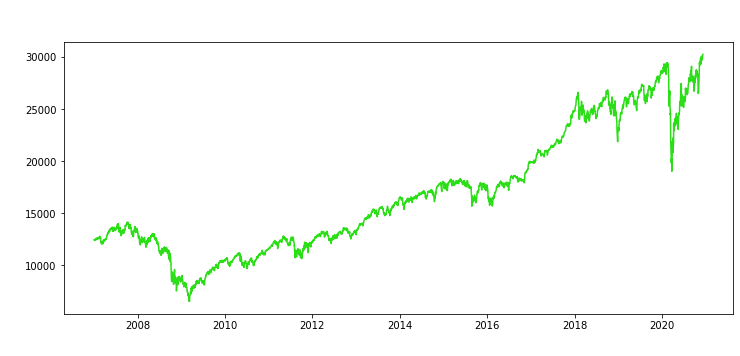



################################################################################




###################################   ^GSPC   ###################################

. Period: from 2007-01-03 to 2020-12-07
. Trading sessions: 3508
. Data:



,high,close,volume,open,low
date,,,,,
2007-01-03,1429.420044,1416.599976,3429160000,1418.030029,1407.859985
2007-01-04,1421.839966,1418.339966,3004460000,1416.599976,1408.430054
2007-01-05,1418.339966,1409.709961,2919400000,1418.339966,1405.750000
2007-01-08,1414.979980,1412.839966,2763340000,1409.260010,1403.969971
2007-01-09,1415.609985,1412.109985,3038380000,1412.839966,1405.420044
...,...,...,...,...,...
2020-12-01,3678.449951,3662.449951,5403660000,3645.870117,3645.870117
2020-12-02,3670.959961,3669.010010,5029620000,3653.780029,3644.840088
2020-12-03,3682.729980,3666.719971,5091760000,3668.280029,3657.169922



. Statistics:



,high,close,volume,open,low
count,3508.000000,3508.000000,3.508000e+03,3508.000000,3508.000000
mean,1893.805136,1883.547733,3.993587e+09,1883.267775,1871.747019
std,697.095831,695.090407,1.155038e+09,695.057231,692.771787
min,695.270020,676.530029,1.025000e+09,679.280029,666.789978
25%,1330.257538,1320.597504,3.282788e+09,1319.882538,1312.359985
50%,1802.649963,1797.600037,3.724025e+09,1796.704956,1788.179993
75%,2432.819946,2420.627441,4.426885e+09,2424.757507,2407.777466
max,3699.199951,3699.120117,1.145623e+10,3694.729980,3678.879883



. Plot:



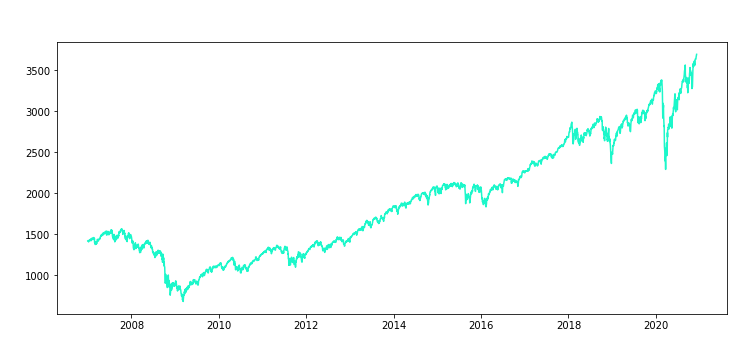



################################################################################




###################################   ^IXIC   ###################################

. Period: from 2007-01-03 to 2020-12-07
. Trading sessions: 3508
. Data:



,high,close,volume,open,low
date,,,,,
2007-01-03,2454.620117,2423.159912,2435280000,2429.719971,2394.659912
2007-01-04,2460.510010,2453.429932,2104210000,2423.820068,2413.750000
2007-01-05,2445.070068,2434.250000,2060360000,2445.070068,2420.590088
2007-01-08,2445.629883,2438.199951,1905620000,2435.250000,2421.129883
2007-01-09,2449.870117,2443.830078,2144160000,2443.260010,2423.560059
...,...,...,...,...,...
2020-12-01,12405.790039,12355.110352,6467180000,12313.360352,12263.929688
2020-12-02,12360.059570,12349.370117,5150820000,12285.750000,12217.349609
2020-12-03,12439.019531,12377.179688,5182100000,12369.259766,12356.990234



. Statistics:



,high,close,volume,open,low
count,3508.000000,3508.000000,3.508000e+03,3508.000000,3508.000000
mean,4577.073657,4549.848133,2.137794e+09,4548.891445,4517.866491
std,2449.162432,2434.667259,6.660341e+08,2433.940049,2417.155135
min,1316.150024,1268.640015,1.494100e+08,1284.839966,1265.520020
25%,2570.992554,2554.312500,1.777898e+09,2555.802429,2535.134949
50%,4066.150024,4045.005005,1.988540e+09,4041.214966,4021.585083
75%,6218.502441,6193.697388,2.270200e+09,6203.107544,6150.790039
max,12536.230469,12519.950195,7.693430e+09,12461.000000,12460.549805



. Plot:



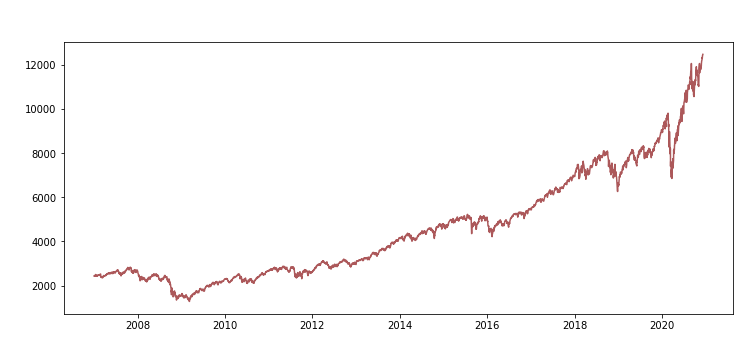



################################################################################




###################################   ^NYA   ###################################

. Period: from 2007-01-03 to 2020-12-07
. Trading sessions: 3508
. Data:



,high,volume,open,low,close
date,,,,,
2007-01-03,9209.299805,3429160000,9137.959961,9092.950195,9133.080078
2007-01-04,9132.250000,0,9132.250000,9070.110352,9113.160156
2007-01-05,9113.160156,2919400000,9113.160156,9002.330078,9025.040039
2007-01-08,9052.099609,2763340000,9025.040039,8993.620117,9041.120117
2007-01-09,9048.269531,3038380000,9041.099609,8984.200195,9023.900391
...,...,...,...,...,...
2020-12-01,14233.459961,5403660000,14183.450195,14131.330078,14146.639648
2020-12-02,14198.790039,5029620000,14104.059570,14076.709961,14188.240234
2020-12-03,14283.730469,5091760000,14210.540039,14184.490234,14217.179688



. Statistics:



,high,volume,open,low,close
count,3508.000000,3.508000e+03,3508.000000,3508.000000,3508.000000
mean,9890.779830,3.979311e+09,9837.355669,9776.581320,9837.302246
std,2183.914597,1.183190e+09,2190.941292,2199.522523,2190.938159
min,4321.759766,0.000000e+00,4226.310059,4181.750000,4226.310059
25%,8164.117432,3.275395e+09,8123.010010,8077.035156,8123.047363
50%,10051.899902,3.720505e+09,10005.115234,9943.334961,10005.830078
75%,11521.532959,4.424832e+09,11481.852783,11419.790283,11465.472412
max,14417.400391,1.145623e+10,14375.549805,14314.469727,14417.330078



. Plot:



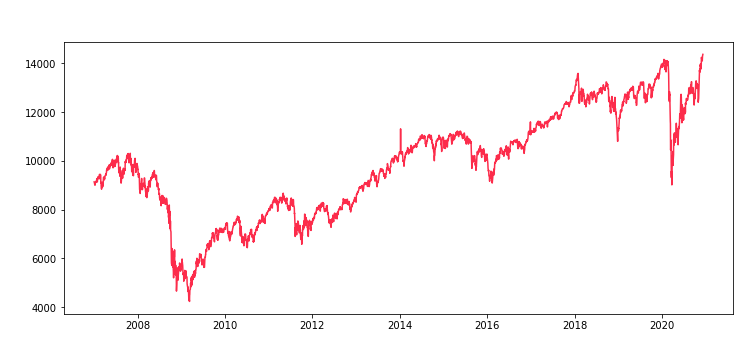



################################################################################




###################################   ^FTSE   ###################################

. Period: from 2007-01-02 to 2020-12-07
. Trading sessions: 3511
. Data:



,close,volume,high,low,open
date,,,,,
2007-01-02,6310.899902,1.074946e+09,6312.500000,6220.799805,6220.799805
2007-01-03,6319.000000,1.606893e+09,6322.000000,6296.000000,6310.899902
2007-01-04,6287.000000,1.902876e+09,6319.000000,6261.000000,6319.000000
2007-01-05,6220.100098,1.622439e+09,6287.000000,6220.100098,6287.000000
2007-01-08,6194.200195,1.326701e+09,6246.000000,6187.000000,6220.100098
...,...,...,...,...,...
2020-12-01,6384.700195,8.398583e+08,6400.200195,6263.600098,6266.200195
2020-12-02,6463.399902,9.368428e+08,6468.600098,6367.500000,6384.700195
2020-12-03,6490.299805,9.432145e+08,6491.500000,6430.299805,6463.399902



. Statistics:



,close,volume,high,low,open
count,3511.000000,3.511000e+03,3511.000000,3511.000000,3511.000000
mean,6267.233408,9.436311e+08,6309.162606,6223.639992,6267.175618
std,873.454391,3.936803e+08,865.302028,882.630251,873.435789
min,3512.100098,6.676710e+07,3564.800049,3460.699951,3512.100098
25%,5752.100098,6.825844e+08,5790.149902,5707.400146,5752.100098
50%,6331.799805,8.236307e+08,6367.799805,6280.100098,6330.500000
75%,6887.850098,1.087422e+09,6917.650146,6848.350098,6887.850098
max,7877.500000,3.761301e+09,7903.500000,7854.600098,7877.500000



. Plot:



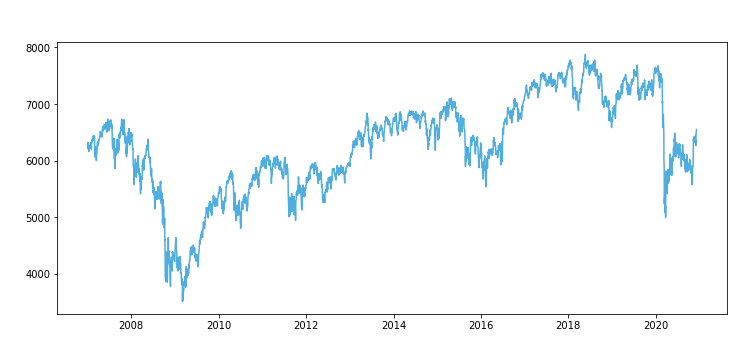



################################################################################




###################################   ^FCHI   ###################################

. Period: from 2007-01-02 to 2020-12-07
. Trading sessions: 3561
. Data:



,close,volume,high,open,low
date,,,,,
2007-01-02,5617.709961,85910000.0,5621.649902,5575.759766,5575.629883
2007-01-03,5610.919922,118580700.0,5623.669922,5621.000000,5596.819824
2007-01-04,5574.560059,130465700.0,5585.540039,5573.729980,5547.169922
2007-01-05,5517.350098,126420500.0,5566.240234,5552.640137,5517.350098
2007-01-08,5518.589844,115053800.0,5555.669922,5532.569824,5509.060059
...,...,...,...,...,...
2020-12-01,5581.640137,0.0,5589.680176,5542.459961,5529.250000
2020-12-02,5583.009766,0.0,5585.870117,5563.049805,5549.790039
2020-12-03,5574.359863,0.0,5584.100098,5581.529785,5546.290039



. Statistics:



,close,volume,high,open,low
count,3561.000000,3.561000e+03,3561.000000,3561.000000,3561.000000
mean,4468.682668,1.225558e+08,4500.303566,4469.857024,4435.208128
std,839.218522,5.239255e+07,836.654594,838.511388,841.721132
min,2519.290039,0.000000e+00,2552.989990,2519.429932,2465.459961
25%,3799.110107,8.611700e+07,3832.020020,3796.790039,3764.840088
50%,4439.669922,1.150538e+08,4469.839844,4437.990234,4407.180176
75%,5176.609863,1.479996e+08,5208.850098,5179.839844,5143.819824
max,6168.149902,5.312476e+08,6168.149902,6157.330078,6112.290039



. Plot:



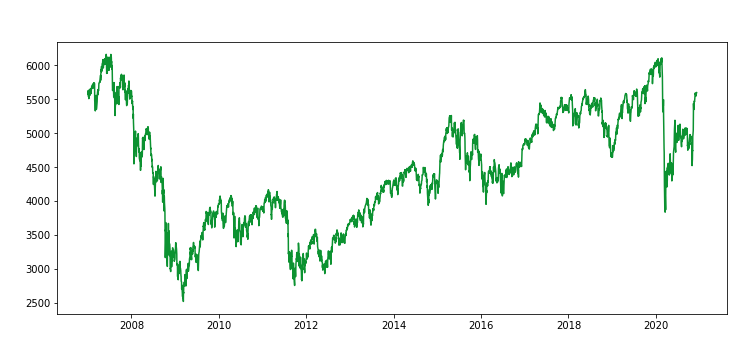



################################################################################


Total number of trading sessions: 24545


<IPython.core.display.Javascript object>

In [4]:
total_sessions = 0
for symbol, sdata in multi_data.stocks:
    print("\n\n" + "#"*35 + f"   {symbol}   " + "#"*35 + "\n\n" +
          f". Period: from {sdata.raw.index[0]} to {sdata.raw.index[-1]}\n" +
          f". Trading sessions: {len(sdata.raw)}\n"
          f". Data:\n")
    display(sdata.raw)
    total_sessions += len(sdata.raw)

    print(f"\n. Statistics:\n")
    display(sdata.raw.describe())

    print(f"\n. Plot:\n")
    ax = sdata.raw["open"].plot(figsize=(12,5), color=np.random.rand(1, 3))
    ax.set_title(f"{symbol} opening prices\n", fontsize=16, color="#ffffff");
    ax.set_ylabel("Opening prices", fontsize="14", color="#ffffff");
    ax.set_xlabel("Date", fontsize="14", color="#ffffff");
    plt.show()
    print("\n\n" + "#"*80 + "\n\n")

print(f"Total number of trading sessions: {total_sessions}")
Javascript("google.colab.output.setIframeHeight('400px');")

In [5]:
# data division dates
for symbol, data in multi_data.stocks:
    print(f">>>>> {symbol}")
    print(". Training range: %s to %s" % (
        data.raw_train["features"].index[0], data.raw_train["features"].index[-1]))
    print(". Validation range: %s to %s" % (
        data.raw_val["features"].index[0], data.raw_val["features"].index[-1]))
    print(". Test range: %s to %s\n" % (
        data.raw_test["features"].index[0], data.raw_test["features"].index[-1]))

>>>>> ^BVSP
. Training range: 2007-01-02 to 2018-02-05
. Validation range: 2018-02-06 to 2019-10-08
. Test range: 2019-10-09 to 2020-11-23

>>>>> ^DJI
. Training range: 2007-01-03 to 2018-02-08
. Validation range: 2018-02-09 to 2019-10-10
. Test range: 2019-10-11 to 2020-11-20

>>>>> ^GSPC
. Training range: 2007-01-03 to 2018-02-08
. Validation range: 2018-02-09 to 2019-10-10
. Test range: 2019-10-11 to 2020-11-20

>>>>> ^IXIC
. Training range: 2007-01-03 to 2018-02-08
. Validation range: 2018-02-09 to 2019-10-10
. Test range: 2019-10-11 to 2020-11-20

>>>>> ^NYA
. Training range: 2007-01-03 to 2018-02-08
. Validation range: 2018-02-09 to 2019-10-10
. Test range: 2019-10-11 to 2020-11-20

>>>>> ^FTSE
. Training range: 2007-01-02 to 2018-02-13
. Validation range: 2018-02-14 to 2019-10-14
. Test range: 2019-10-15 to 2020-11-23

>>>>> ^FCHI
. Training range: 2007-01-02 to 2018-02-07
. Validation range: 2018-02-08 to 2019-10-10
. Test range: 2019-10-11 to 2020-11-23



In [6]:
# comparing normalized values of the training sets
print("#"*20 + " Normalized training data " + "#"*20)
for symbol, data in multi_data.stocks:
    print(f"\n>>>>> {symbol}")
    display(data.norm_train["features"].tail())

Javascript("google.colab.output.setIframeHeight('300px');")

#################### Normalized training data ####################

>>>>> ^BVSP


,close,open,low,volume,high
date,,,,,
2018-01-30,0.981300,0.985132,0.981425,0.015353,0.972302
2018-01-31,0.988983,0.981352,0.993700,0.018227,1.000000
2018-02-01,0.999358,0.988983,1.000000,0.017589,0.996620
2018-02-02,0.973438,0.999358,0.981913,0.014539,0.986882
2018-02-05,0.934576,0.973419,0.946352,0.014008,0.965249



>>>>> ^DJI


,close,open,high,volume,low
date,,,,,
2018-02-02,0.945403,0.973924,0.972124,0.630841,0.952684
2018-02-05,0.886846,0.937795,0.944935,0.865744,0.874209
2018-02-06,0.915099,0.875277,0.916086,1.000000,0.866940
2018-02-07,0.914131,0.915587,0.933554,0.608451,0.917362
2018-02-08,0.862666,0.916057,0.913949,0.795912,0.870470



>>>>> ^GSPC


,high,close,volume,open,low
date,,,,,
2018-02-02,0.970633,0.949580,0.314069,0.973349,0.958113
2018-02-05,0.949724,0.898044,0.408241,0.942334,0.902361
2018-02-06,0.921092,0.919079,0.466547,0.884618,0.881718
2018-02-07,0.933321,0.912941,0.345268,0.919431,0.922117
2018-02-08,0.913850,0.867111,0.410349,0.916717,0.875992



>>>>> ^IXIC


,high,close,volume,open,low
date,,,,,
2018-02-02,0.977165,0.957541,0.546225,0.977921,0.964884
2018-02-05,0.963098,0.913704,0.666050,0.948624,0.921160
2018-02-06,0.938733,0.937489,0.671626,0.895653,0.898106
2018-02-07,0.945808,0.927244,0.495258,0.935759,0.934731
2018-02-08,0.930241,0.883182,0.573909,0.932710,0.890343



>>>>> ^NYA


,high,volume,open,low,close
date,,,,,
2018-02-02,0.963214,0.375440,0.968136,0.950486,0.941378
2018-02-05,0.937000,0.461187,0.933955,0.890890,0.886928
2018-02-06,0.907907,0.514276,0.871247,0.871606,0.905260
2018-02-07,0.917293,0.403848,0.904356,0.908760,0.899068
2018-02-08,0.899612,0.463105,0.904882,0.864434,0.854807



>>>>> ^FTSE


,close,volume,high,low,open
date,,,,,
2018-02-07,0.882995,0.260015,0.886206,0.855440,0.850650
2018-02-08,0.857518,0.245456,0.878613,0.860065,0.882995
2018-02-09,0.839166,0.232918,0.852902,0.839543,0.857518
2018-02-12,0.859018,0.176470,0.859809,0.844051,0.839166
2018-02-13,0.856885,0.176537,0.860542,0.861110,0.859018



>>>>> ^FCHI


,close,volume,high,open,low
date,,,,,
2018-02-01,0.804432,0.163815,0.823313,0.822222,0.813619
2018-02-02,0.779885,0.186942,0.797826,0.801124,0.795080
2018-02-05,0.758193,0.182047,0.768923,0.770640,0.772674
2018-02-06,0.724204,0.330088,0.739425,0.710533,0.722735
2018-02-07,0.749990,0.221657,0.750974,0.739075,0.741449


<IPython.core.display.Javascript object>

In [7]:
# comparing normalized values of the validation sets
print("#"*20 + " Normalized validation data " + "#"*20)
for symbol, data in multi_data.stocks:
    print(f"\n>>>>> {symbol}")
    display(data.norm_val["features"].tail())

Javascript("google.colab.output.setIframeHeight('300px');")

#################### Normalized validation data ####################

>>>>> ^BVSP


,close,open,low,volume,high
date,,,,,
2019-10-02,1.276312,1.330130,1.290823,0.021812,1.325873
2019-10-03,1.284958,1.276327,1.270642,0.020087,1.280398
2019-10-04,1.303408,1.284973,1.292863,0.020018,1.299033
2019-10-07,1.268147,1.303336,1.283566,0.016956,1.298412
2019-10-08,1.257594,1.268019,1.271400,0.018697,1.275574



>>>>> ^DJI


,close,open,high,volume,low
date,,,,,
2019-10-04,0.997858,0.984400,0.998695,0.261057,0.991804
2019-10-07,0.993089,0.995910,1.001966,0.229041,0.999459
2019-10-08,0.977445,0.984644,0.990210,0.289603,0.985197
2019-10-09,0.986512,0.986223,0.990335,0.222739,0.990704
2019-10-10,0.994019,0.986678,0.999327,0.256606,0.993948



>>>>> ^GSPC


,high,close,volume,open,low
date,,,,,
2019-10-04,1.037137,1.036033,0.188456,1.023460,1.030705
2019-10-07,1.039897,1.030014,0.183597,1.035193,1.038541
2019-10-08,1.024155,1.009193,0.223507,1.024301,1.018849
2019-10-09,1.025923,1.021185,0.163147,1.020051,1.025601
2019-10-10,1.034712,1.029713,0.210162,1.023456,1.030046



>>>>> ^IXIC


,high,close,volume,open,low
date,,,,,
2019-10-04,1.077687,1.076429,0.349815,1.068386,1.071702
2019-10-07,1.081999,1.072232,0.350406,1.076124,1.078599
2019-10-08,1.067227,1.050987,0.395218,1.066746,1.059480
2019-10-09,1.068688,1.063807,0.307576,1.066373,1.067523
2019-10-10,1.077076,1.071348,0.359476,1.067760,1.071770



>>>>> ^NYA


,high,volume,open,low,close
date,,,,,
2019-10-04,0.913925,0.261066,0.903606,0.909241,0.914409
2019-10-07,0.916205,0.256641,0.917092,0.917666,0.908691
2019-10-08,0.903119,0.292980,0.908370,0.898542,0.888838
2019-10-09,0.902668,0.238021,0.896405,0.902033,0.899491
2019-10-10,0.910442,0.280830,0.903462,0.908414,0.907444



>>>>> ^FTSE


,close,volume,high,low,open
date,,,,,
2019-10-08,0.851072,0.169466,0.865486,0.855858,0.863893
2019-10-09,0.856533,0.139465,0.858981,0.855091,0.851072
2019-10-10,0.861198,0.171403,0.862884,0.852906,0.856533
2019-10-11,0.875425,0.390015,0.871683,0.856207,0.861198
2019-10-14,0.867549,0.193208,0.872085,0.867711,0.875425



>>>>> ^FCHI


,close,volume,high,open,low
date,,,,,
2019-10-04,0.813687,0.143430,0.811950,0.807444,0.811812
2019-10-07,0.822810,0.114737,0.821872,0.812925,0.821571
2019-10-08,0.804999,0.136825,0.823836,0.826460,0.818865
2019-10-09,0.816652,0.130386,0.819507,0.807809,0.817573
2019-10-10,0.835812,0.164258,0.837606,0.825078,0.828585


<IPython.core.display.Javascript object>

In [8]:
# comparing normalized values of the test sets
print("#"*20 + " Normalized test data " + "#"*20)
for symbol, data in multi_data.stocks:
    print(f"\n>>>>> {symbol}")
    display(data.norm_test["features"].tail())

Javascript("google.colab.output.setIframeHeight('300px');")

#################### Normalized test data ####################

>>>>> ^BVSP


,close,open,low,volume,high
date,,,,,
2020-11-16,1.372558,1.342253,1.359147,0.050478,1.370983
2020-11-17,1.386801,1.372578,1.379328,0.044393,1.394588
2020-11-18,1.373503,1.387125,1.386007,0.044506,1.388321
2020-11-19,1.374109,1.366998,1.373876,0.036836,1.379296
2020-11-23,1.389475,1.365803,1.382992,0.041702,1.388833



>>>>> ^DJI


,close,open,high,volume,low
date,,,,,
2020-11-16,1.166108,1.154117,1.168160,0.502593,1.162132
2020-11-17,1.157782,1.160494,1.163545,0.446299,1.154515
2020-11-18,1.140596,1.164250,1.166480,0.459137,1.150135
2020-11-19,1.142828,1.139073,1.146088,0.395963,1.139894
2020-11-20,1.131879,1.142399,1.143325,0.364107,1.140035



>>>>> ^GSPC


,high,close,volume,open,low
date,,,,,
2020-11-16,1.347006,1.343317,0.408100,1.334985,1.342694
2020-11-17,1.344526,1.335403,0.361853,1.339624,1.337439
2020-11-18,1.342680,1.316399,0.407378,1.340437,1.327667
2020-11-19,1.327126,1.322810,0.318486,1.316360,1.316915
2020-11-20,1.325294,1.311732,0.306193,1.325455,1.322870



>>>>> ^IXIC


,high,close,volume,open,low
date,,,,,
2020-11-16,1.716029,1.708396,0.904279,1.703694,1.704252
2020-11-17,1.718042,1.704422,0.900551,1.714378,1.710313
2020-11-18,1.716800,1.688751,1.033600,1.711589,1.701840
2020-11-19,1.711976,1.705283,1.177505,1.692714,1.695543
2020-11-20,1.715666,1.697308,1.176757,1.711047,1.710329



>>>>> ^NYA


,high,volume,open,low,close
date,,,,,
2020-11-16,1.037411,0.461057,1.037729,1.036332,1.036679
2020-11-17,1.037822,0.418948,1.030749,1.029876,1.033162
2020-11-18,1.039461,0.460400,1.042023,1.028765,1.018238
2020-11-19,1.025146,0.379462,1.018440,1.018709,1.024038
2020-11-20,1.026455,0.368269,1.027793,1.028965,1.020188



>>>>> ^FTSE


,close,volume,high,low,open
date,,,,,
2020-11-17,0.668745,0.313566,0.676404,0.661980,0.681870
2020-11-18,0.673409,0.247114,0.669639,0.666093,0.668745
2020-11-19,0.661502,0.233387,0.667108,0.663211,0.673409
2020-11-20,0.665510,0.204179,0.667463,0.665605,0.661502
2020-11-23,0.661362,0.237362,0.668740,0.665745,0.665510



>>>>> ^FCHI


,close,volume,high,open,low
date,,,,,
2020-11-17,0.812229,0.000000,0.811671,0.810594,0.815996
2020-11-18,0.820026,0.000000,0.820993,0.810561,0.818974
2020-11-19,0.809943,0.000000,0.812465,0.807771,0.818242
2020-11-20,0.815762,0.000000,0.821889,0.809412,0.821516
2020-11-23,0.814737,0.180682,0.830624,0.831359,0.829951


<IPython.core.display.Javascript object>

In [9]:
# sample output shape
sample_x, sample_y = next(iter(multi_data.tf_datasets["train"]))
print(f"Sample input shape: {sample_x.shape}")
print(f"Sample label shape: {sample_y.shape}")

Sample input shape: (42, 10, 5)
Sample label shape: (42, 3)


## **2) Defining a model**

In [10]:
class MultiLSTM(tf.keras.Model):
    """ Custom LSTM model. """

    def __init__(self, num_sessions=NUM_SESSIONS):
        super(MultiLSTM, self).__init__()
        self._num_sessions = num_sessions

        self._open_predictor = model = tf.keras.models.Sequential([
            #tf.keras.layers.LSTM(256, return_sequences=True),
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.LSTM(32, return_sequences=True),
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.LSTM(32, return_sequences=False),
            #tf.keras.layers.Dropout(0.3),
            #tf.keras.layers.Dense(128, activation="tanh"),  
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(1, activation="relu"),
        ])

        self._pre_lowest = tf.keras.layers.LSTM(32, return_sequences=True)
        self._lowest_predictor = tf.keras.models.Sequential([
            #tf.keras.layers.LSTM(256, return_sequences=True),
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.LSTM(32, return_sequences=True),
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.LSTM(32, return_sequences=False),
            #tf.keras.layers.Dropout(0.3),
            #tf.keras.layers.Dense(128, activation="tanh"),  
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(1, activation="relu"),
        ])

        self._pre_highest = tf.keras.layers.LSTM(32, return_sequences=True)
        self._highest_predictor = tf.keras.models.Sequential([
            #tf.keras.layers.LSTM(256, return_sequences=True),
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.LSTM(32, return_sequences=True),
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.LSTM(32, return_sequences=False),
            #tf.keras.layers.Dropout(0.3),
            #tf.keras.layers.Dense(128, activation="tanh"),  
            #tf.keras.layers.Dropout(0.3),
            tf.keras.layers.Dense(1, activation="relu"),
        ])

    def call(self, inputs, training=None):
        # calculating the opening price
        open_price = self._open_predictor(inputs, training=training)

        # cloning prices: expanding shape from (batches, 1) to (batches, NUM_SESSIONS, 1)
        open_price_exp = tf.tile(tf.expand_dims(open_price, -1),   
                                 [1, self._num_sessions, 1])

        # calculating the lowest price
        lowest_price = self._lowest_predictor(
            # appends the opening price to the end of each item in the input sequence
            tf.concat([self._pre_lowest(inputs), open_price_exp], -1),
            training=training,
        )

        # cloning prices: expanding shape from (batches, 1) to (batches, NUM_SESSIONS, 1)
        lowest_price_exp = tf.tile(tf.expand_dims(lowest_price, -1),   
                                   [1, self._num_sessions, 1])

        # calculating the highest price
        highest_price = self._highest_predictor(
            # appends the opening price and the lowest price to the end of each item in the input sequence
            tf.concat(
                [self._pre_highest(inputs), open_price_exp, lowest_price_exp], -1),
            training=training,
        )

        # returning the concatenation of the opening price, lowest price and highest price
        return tf.concat([open_price, lowest_price, highest_price], -1)

In [11]:
# testing output shape
x, y = next(iter(multi_data.tf_datasets["train"]))
MultiLSTM()(x).shape

TensorShape([42, 3])

## **3) Training the model**

In [12]:
# loading all validation data into memory (so we dont have to use a generator)
val_inputs, val_outputs = [], []
for x, y in multi_data.tf_datasets["val"]:
    val_inputs.append(x)
    val_outputs.append(y)

val_inputs = tf.concat(val_inputs, axis=0)
val_outputs = tf.concat(val_outputs, axis=0)

print(val_inputs.shape, val_outputs.shape)

(2877, 10, 5) (2877, 3)



Epoch 00010: val_loss improved from 0.00080 to 0.00055, saving model to saved_model_2020-12-09-23-21-58/checkpoint_best


INFO:tensorflow:Assets written to: saved_model_2020-12-09-23-21-58/assets


INFO:tensorflow:Assets written to: saved_model_2020-12-09-23-21-58/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

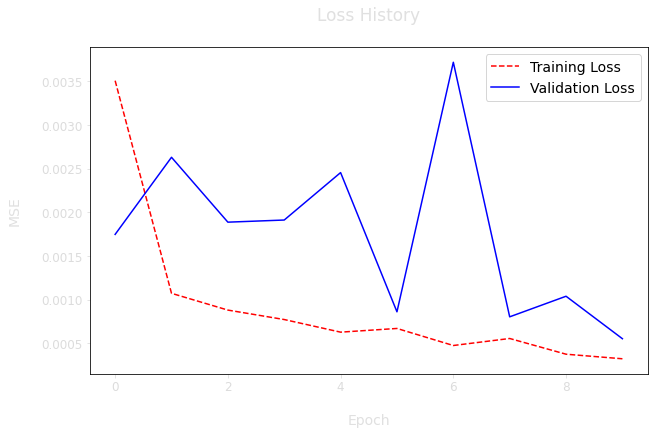

In [13]:
save_path = f"saved_model_{datetime.today().strftime('%Y-%m-%d-%H-%M-%S')}"

# building and compiling
model = MultiLSTM()
model.compile(loss=tf.losses.MeanSquaredError(),
              optimizer=tf.optimizers.Adam(learning_rate=1e-3),
              metrics=[])
                       #tf.metrics.MeanAbsoluteError()]) 
                       #tf.metrics.MeanAbsolutePercentageError()])

# training
epochs = 10
history = model.fit(
    multi_data.tf_datasets["train"].shuffle(buffer_size=multi_data.size["train"]), 
    epochs=epochs,
    validation_data=(val_inputs, val_outputs),
    callbacks=[ClearCallback(),
               ModelCheckpoint(filepath=os.path.join(save_path, "checkpoint_best"), 
                                                     monitor='val_loss', 
                                                     verbose=1, save_best_only=True)],
)

# restoring the checkpoint of the best model
model.load_weights(os.path.join(save_path, "checkpoint_best"))

# saving and downloading the model
model.save(save_path)
shutil.make_archive(save_path, "zip", save_path)
files.download(f"{save_path}.zip")

# visualizing loss history
print("\n\n")
plt.rc('xtick',labelsize=12, color="#DCDCDC")
plt.rc('ytick',labelsize=12, color="#DCDCDC")
plt.rcParams.update({'legend.fontsize': 14, 'legend.handlelength': 2})

plt.figure(figsize=(10, 6))
plt.plot(range(epochs), history.history["loss"], 'r--')
plt.plot(range(epochs), history.history["val_loss"], 'b-')
plt.legend(['Training Loss', 'Validation Loss'])

plt.title("Loss History\n", fontsize=17, color="#E0E0E0")
plt.ylabel('MSE\n', fontsize=14, color="#E0E0E0")
plt.xlabel('\nEpoch', fontsize=14, color="#E0E0E0")
plt.show();

## **4) Evaluating on all the stocks**

In [57]:
loss = {}
for mode in ["train", "val", "test"]:
    loss[mode] = model.evaluate(multi_data.tf_datasets[mode])

loss = pd.Series(loss.values(), index=loss.keys())
print("\n\n>>> Loss value (on the normalized data):")
loss

47/47 [==============================] - 1s 25ms/step - loss: 0.0021


>>> Loss value (on the normalized data):


train    0.000313
val      0.000554
test     0.002135
dtype: float64

## **5) Evaluating on individual stocks**

In [58]:
results, predictions = {}, {}
for stk in STOCKS.keys():
    results[stk], predictions[stk] = {}, {}
    for mode in ["train", "val", "test"]:
        predictions[stk][mode], results[stk][mode] = eval(model, 
                                                          multi_data[stk], mode)

#### **5.1) Training data**

In [59]:
symbol = "^BVSP"

     Training Data

#########################

[> GENERAL <]
   . MAE:   897
   . MAPE:  1.6187%
   . MSE:   1440333

#########################

[> OPEN <]
   . MAE:   538
   . MAPE:  0.9735%
   . MSE:   497311
   . Tendency Accuracy:  72.9868%

#########################

[> LOW <]
   . MAE:   960
   . MAPE:  1.7691%
   . MSE:   1764929
   . Tendency Accuracy:  52.2328%

#########################

[> HIGH <]
   . MAE:   1194
   . MAPE:  2.1135%
   . MSE:   2058758
   . Tendency Accuracy:  49.3411%

#########################


<IPython.core.display.Javascript object>

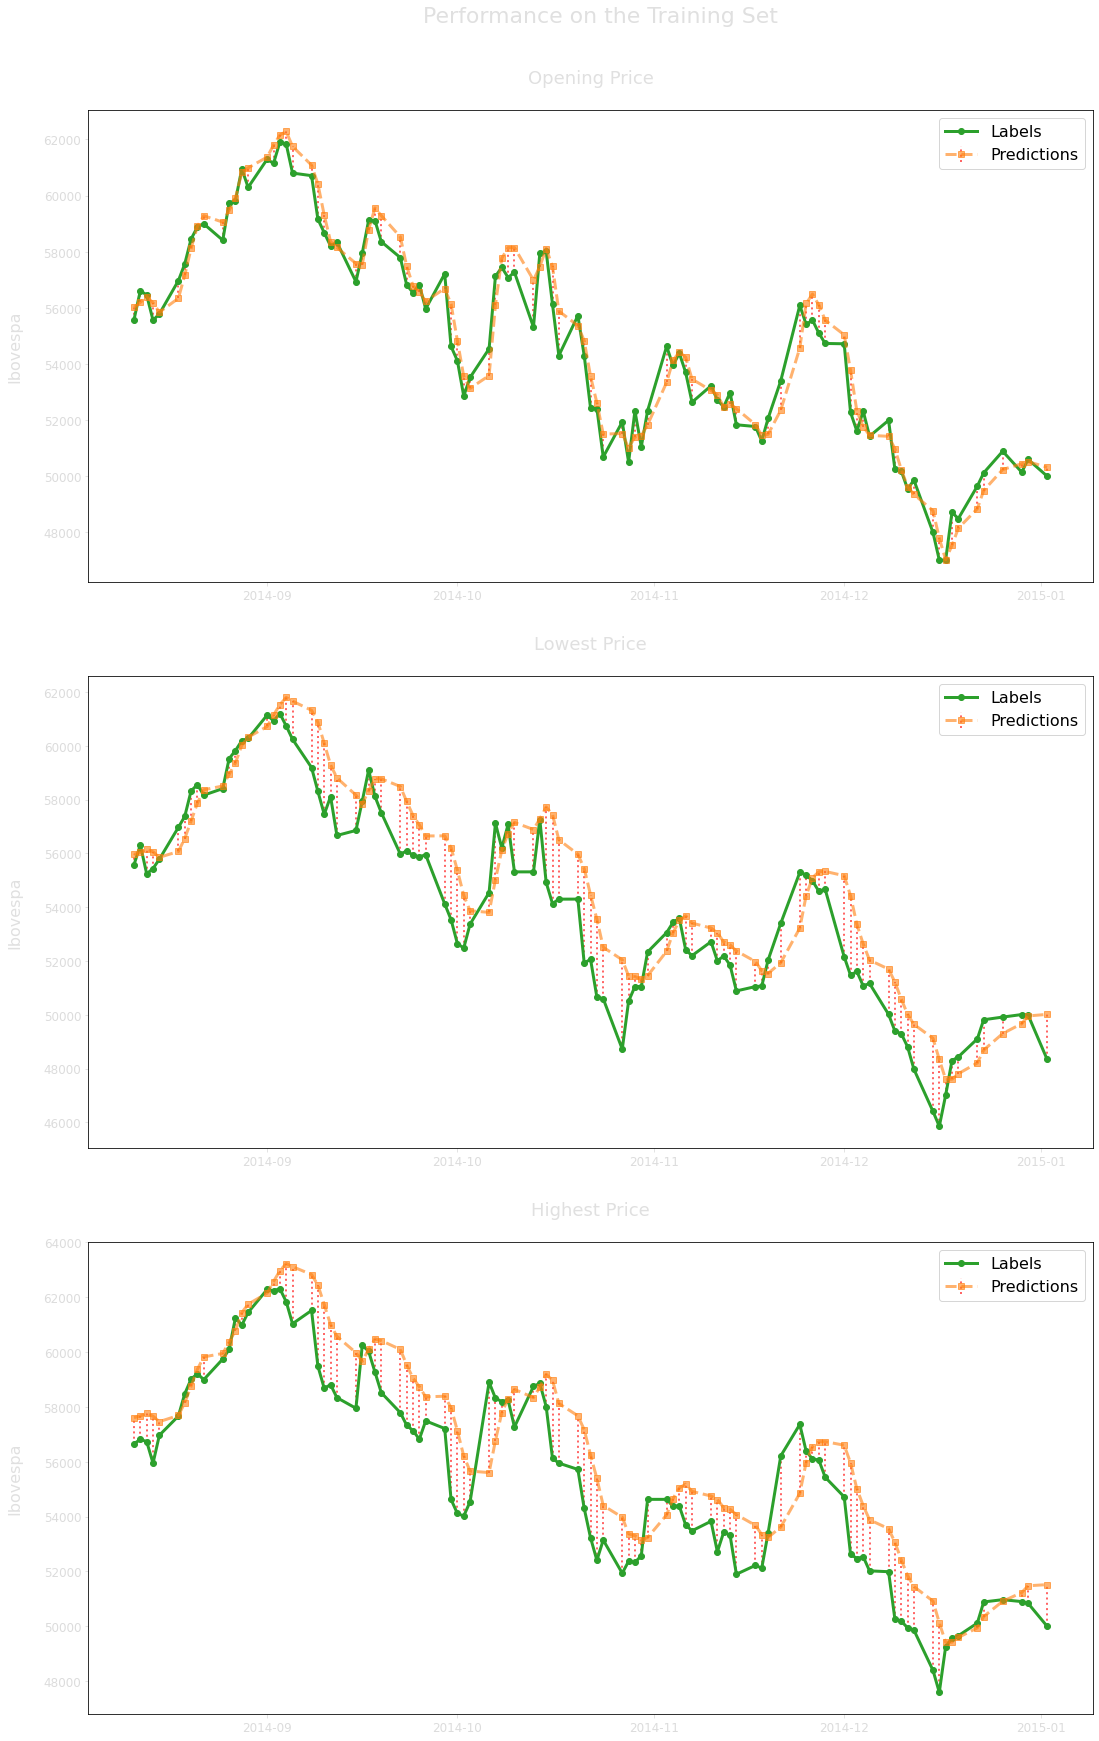

In [63]:
print("     Training Data\n")
eval_print(results[symbol]["train"])
eval_plot(predictions[symbol]["train"], 
          multi_data[symbol].raw_train["labels"], 
          start_date="random", 
          plot_samples=100, 
          title="Performance on the Training Set")

Javascript("google.colab.output.setIframeHeight('600px');")

#### **5.2) Validation data**

     Validation Data

#########################

[> GENERAL <]
   . MAE:   1356
   . MAPE:  1.5203%
   . MSE:   2608025

#########################

[> OPEN <]
   . MAE:   1191
   . MAPE:  1.3433%
   . MSE:   1704238
   . Tendency Accuracy:  54.7264%

#########################

[> LOW <]
   . MAE:   1468
   . MAPE:  1.6559%
   . MSE:   3237944
   . Tendency Accuracy:  49.7512%

#########################

[> HIGH <]
   . MAE:   1410
   . MAPE:  1.5617%
   . MSE:   2881894
   . Tendency Accuracy:  46.7662%

#########################


<IPython.core.display.Javascript object>

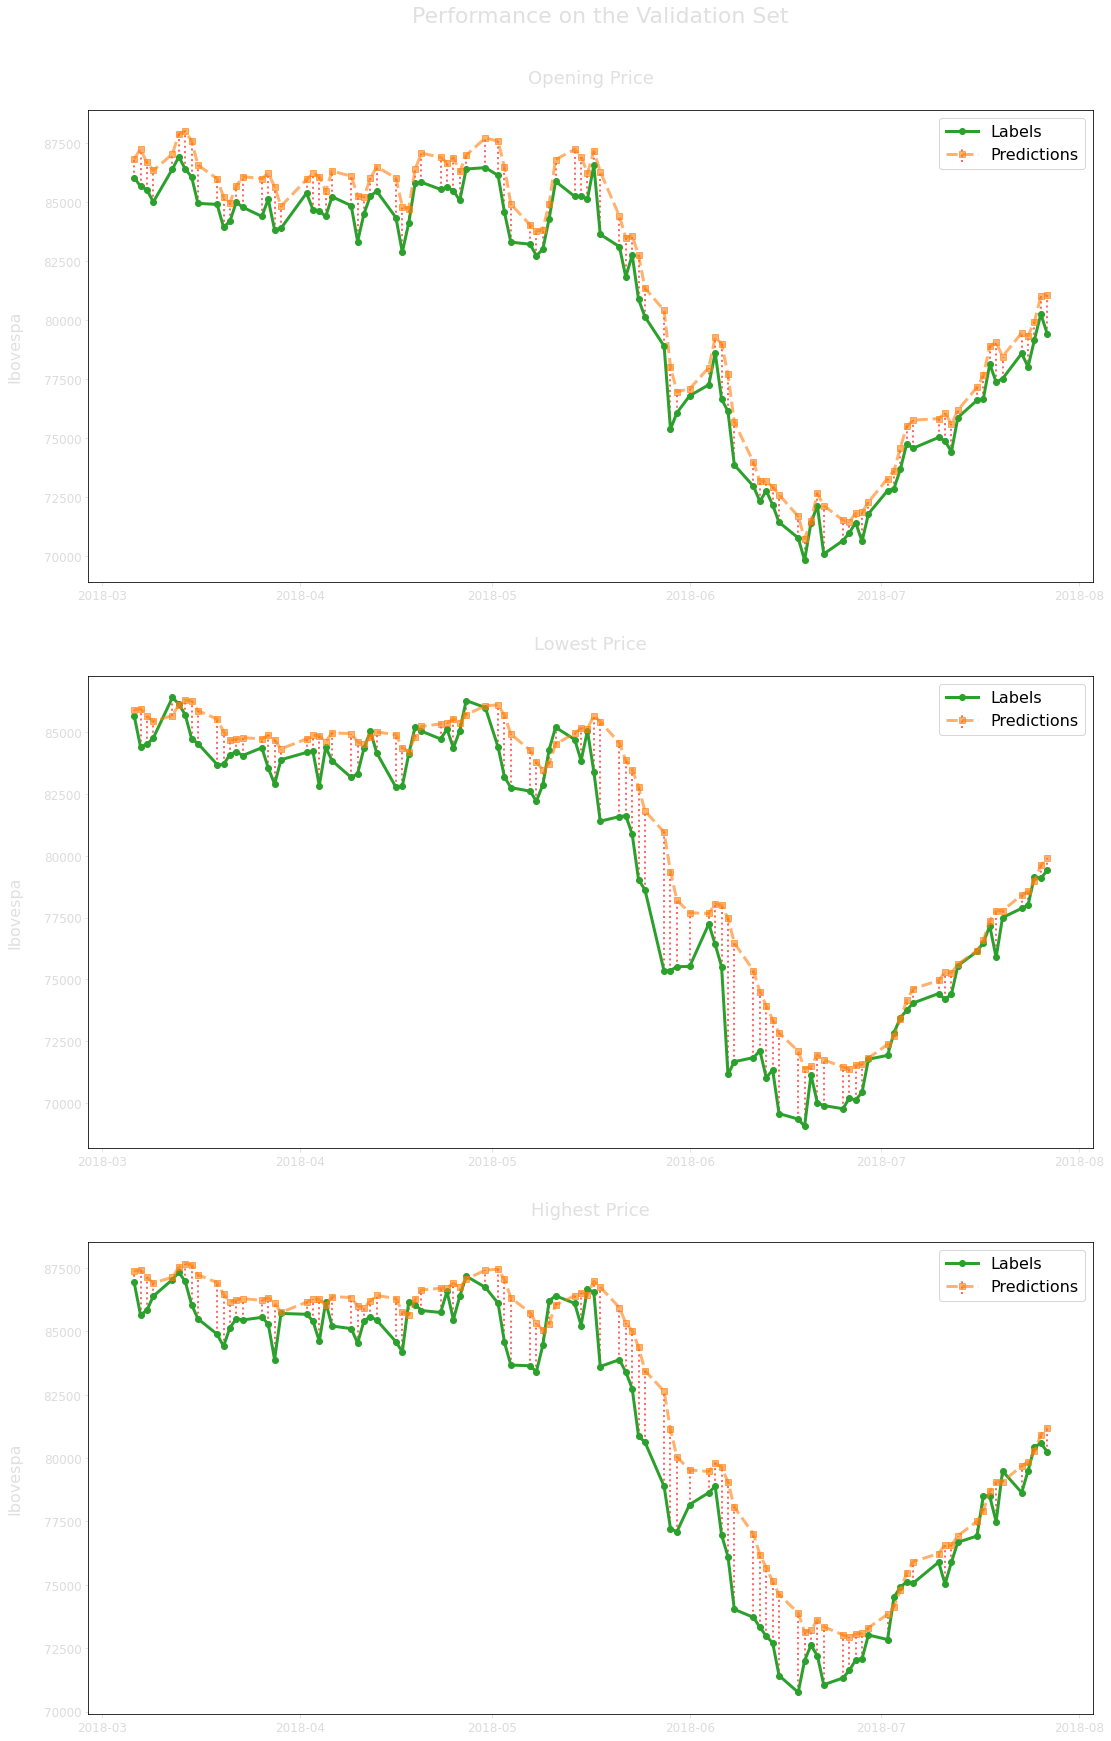

In [65]:
print("     Validation Data\n")
eval_print(results[symbol]["val"])
eval_plot(predictions[symbol]["val"], 
          multi_data[symbol].raw_val["labels"], 
          start_date="random", 
          plot_samples=100, 
          title="Performance on the Validation Set")

Javascript("google.colab.output.setIframeHeight('600px');")

#### **5.3) Test data**

    Test Data

#########################

[> GENERAL <]
   . MAE:   2612
   . MAPE:  2.6702%
   . MSE:   12944996

#########################

[> OPEN <]
   . MAE:   1252
   . MAPE:  1.3656%
   . MSE:   2987342
   . Tendency Accuracy:  66.6667%

#########################

[> LOW <]
   . MAE:   3420
   . MAPE:  3.5774%
   . MSE:   21049643
   . Tendency Accuracy:  49.0637%

#########################

[> HIGH <]
   . MAE:   3164
   . MAPE:  3.0675%
   . MSE:   14798003
   . Tendency Accuracy:  47.9401%

#########################


<IPython.core.display.Javascript object>

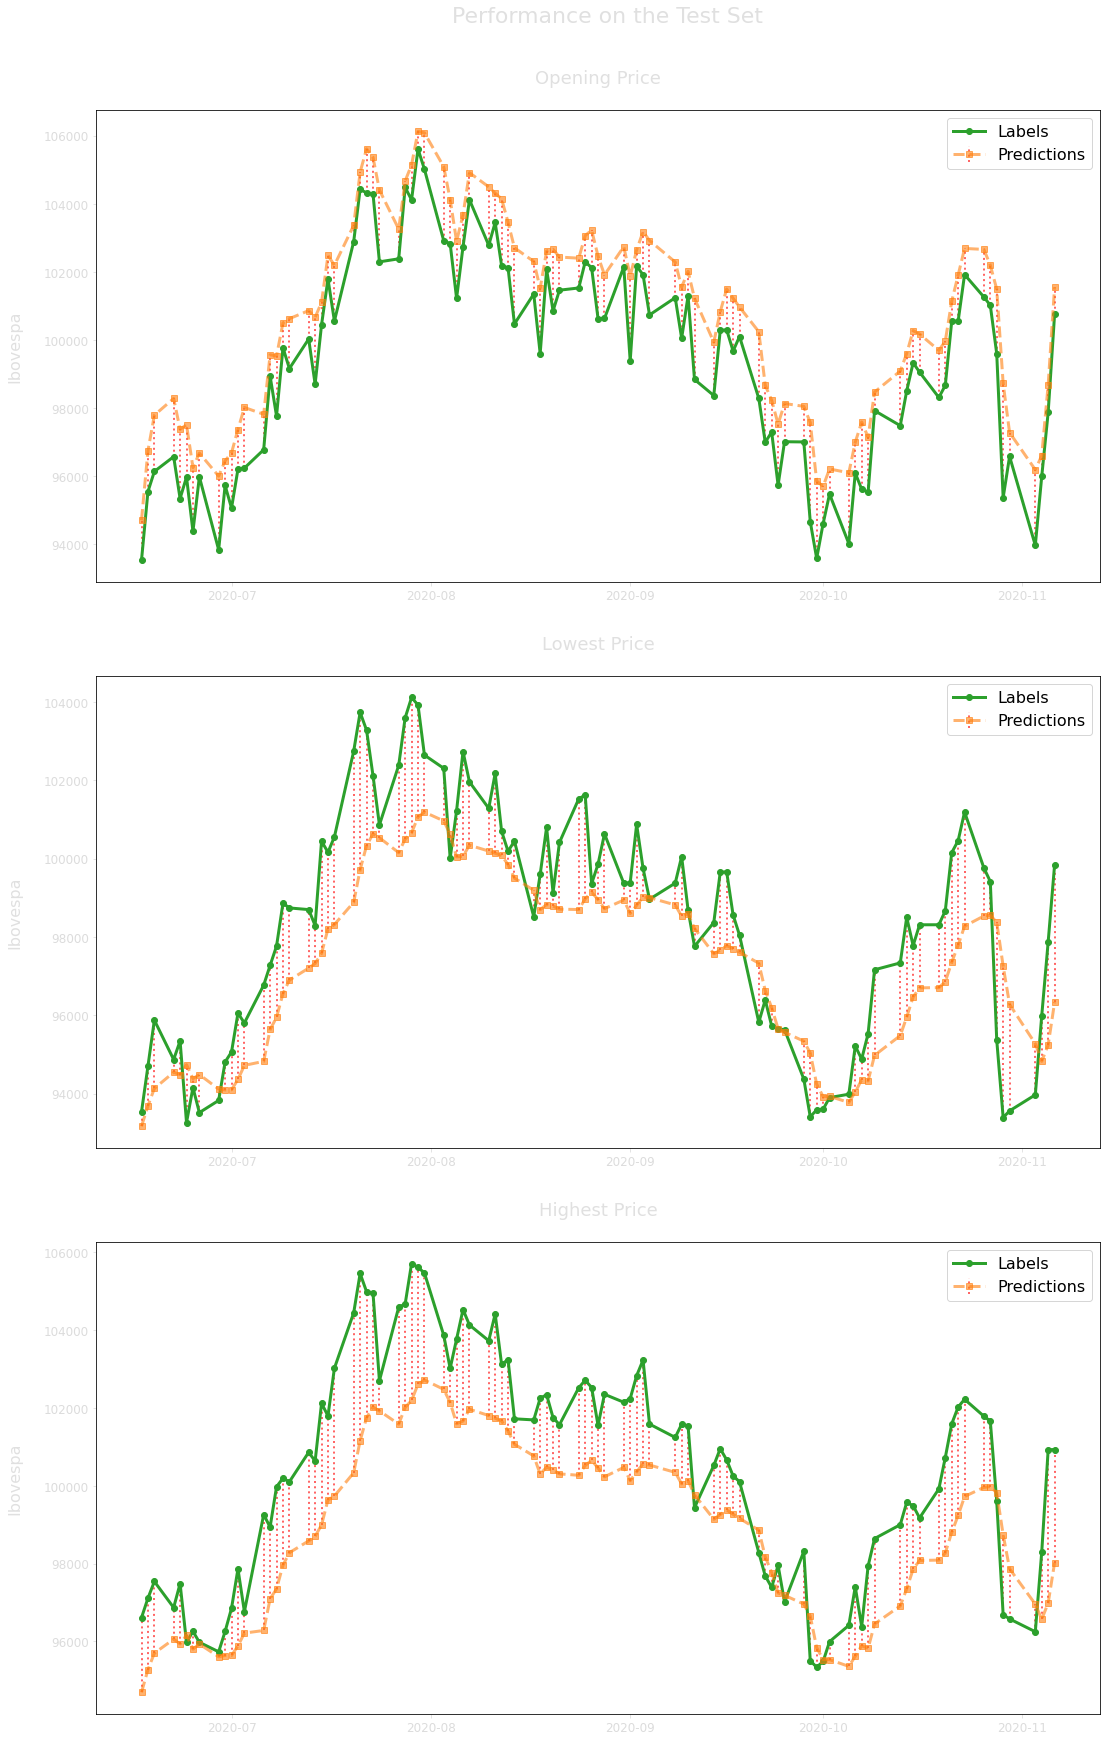

In [66]:
print("    Test Data\n")
eval_print(results[symbol]["test"])
eval_plot(predictions[symbol]["test"], 
          multi_data[symbol].raw_test["labels"], 
          start_date="random", 
          plot_samples=100, 
          title="Performance on the Test Set")

Javascript("google.colab.output.setIframeHeight('600px');")